In [2]:
import pandas as pd
import numpy as np
import math as m
#from datetime import datetime
from datetime import date, datetime, timedelta
import csv
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [5]:
import scipy

In [6]:
df=pd.read_csv('results_hum_tarda.csv')

C:\Users\T.C\AppData\Local\Temp\ipykernel_2728\2687061320.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('results_hum_tarda.csv')


In [7]:
df

,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg,Hour,Day,kt_10min
0,2011-01-01 00:00:00,NaN,NaN,NaN,160.554628,0.000000,1.000000,NaN
1,2011-01-01 00:10:00,NaN,NaN,NaN,160.371428,0.166667,1.006944,NaN
2,2011-01-01 00:20:00,NaN,NaN,NaN,159.973113,0.333333,1.013889,NaN
3,2011-01-01 00:30:00,NaN,NaN,NaN,159.372358,0.500000,1.020833,NaN
4,2011-01-01 00:40:00,NaN,NaN,NaN,158.586522,0.666667,1.027778,NaN
...,...,...,...,...,...,...,...,...
622355,2022-12-12 23:10:00,0.0,NaN,NaN,159.141635,23.166667,346.965278,NaN
622356,2022-12-12 23:20:00,0.0,NaN,NaN,159.824243,23.333333,346.972222,NaN
622357,2022-12-12 23:30:00,0.0,NaN,NaN,160.310736,23.500000,346.979167,NaN
622358,2022-12-12 23:40:00,0.0,NaN,NaN,160.586078,23.666667,346.986111,NaN


In [8]:
print(df['kt_10min'][60:80])

60         NaN
61         NaN
62         NaN
63         NaN
64         NaN
65         NaN
66         NaN
67         NaN
68         NaN
69         NaN
70         NaN
71         NaN
72    0.643244
73    0.660301
74    0.807952
75    0.843717
76    0.699648
77    0.666401
78    0.836300
79    0.830077
Name: kt_10min, dtype: float64


In [41]:
kt = df['kt_10min']

In [45]:
kt[:10]

0    nan
1    nan
2    nan
3    nan
4    nan
5    nan
6    nan
7    nan
8    nan
9    nan
Name: kt_10min, dtype: object

In [46]:
kt = kt.astype(str)

In [52]:
kt[:10]

['nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']

In [50]:
kt=list(map(lambda x: x.replace('NaN','np.nan'),kt))

In [73]:
kt = np.array(kt)
kt = kt.astype(float)

In [57]:
print(len(kt))
print((kt[kt != np.nan]).shape)

622360
(622360,)


In [61]:
kt[np.isnan(kt) == False]

array([0.64324354, 0.6603009 , 0.80795196, ..., 0.1064149 , 0.09206927,
       0.09215235])

In [63]:
kt[:10]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [66]:
kt_n = kt
clear = kt[kt>=0.5]

len(kt[kt>=0.5])/len(kt[np.isnan(kt) == False])
#Malament

0.5049478353674031

In [67]:
np.sum(kt >= 0.5)/len(kt[np.isnan(kt) == False])

0.5049478353674031

In [71]:
#----------------------------------

In [83]:
abaix = len(kt[kt<=0.2])/len(kt[np.isnan(kt) == False])
print(abaix)

0.18261614526234782


In [84]:
enmig = len(kt[(0.8>kt) & (kt>0.2)])/len(kt[np.isnan(kt) == False])
print(enmig)

0.6395086287635131


In [85]:
amunt = len(kt[kt>=0.8])/len(kt[np.isnan(kt) == False])
print(amunt)

0.17787522597413913


In [81]:
abaix + enmig + amunt

1.0

In [88]:
def getMonths(input, m1, m2, m3):
    return input.loc[(input.TIMESTAMP.dt.month==m1) | (input.TIMESTAMP.dt.month==m2) | (input.TIMESTAMP.dt.month==m3)]

In [96]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format='%Y/%m/%d')#.dt.strftime('%Y/%m/%d')


#dfn = pd.to_datetime(dfn,format='%Y/%m/%d')


spring = getMonths(df,3,4,5)
summer = getMonths(df,6,7,8)
autumn = getMonths(df,9,10,11)
winter = getMonths(df,12,1,2)

In [107]:
kt = winter['kt_10min']

In [108]:
abaix = len(kt[kt<=0.2])/len(kt[np.isnan(kt) == False])
print(abaix)

0.1081204902073073


In [109]:
enmig = len(kt[(0.8>kt) & (kt>0.2)])/len(kt[np.isnan(kt) == False])
print(enmig)

0.7082044821135418


In [110]:
amunt = len(kt[kt>=0.8])/len(kt[np.isnan(kt) == False])
print(amunt)

0.18367502767915092


In [106]:
abaix + enmig + amunt

1.0

In [ ]:
#--------------------------------------

0.49977718081200184
0.5065290470749779


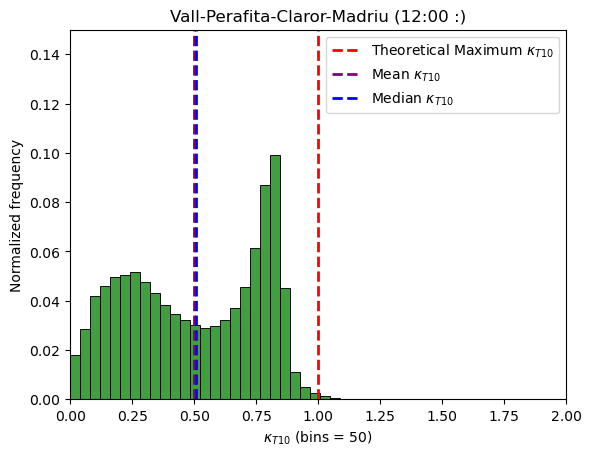

In [13]:
sns.histplot(data= kt, stat = 'probability',bins =50,color = 'green') # fer això amb un kt diari

# PROVAR DE FER ELS BINS DINTRE DE RANG DETERMINAT [0,2]

plt.vlines(x=1, ymin = 0,ymax= 0.15, colors='red', ls='--', lw=2, label=r'Theoretical Maximum $\kappa_{T10}$')
plt.vlines(x=kt.mean(),ymin = 0,ymax= 0.15, colors='purple', ls='--', lw=2, label=r'Mean $\kappa_{T10}$')
plt.vlines(x=kt.median(),ymin = 0,ymax= 0.15, colors='blue', ls='--', lw=2, label=r'Median $\kappa_{T10}$')

plt.ylim(0,0.15)
plt.xlim(0,2)
plt.legend(loc=1)

plt.ylabel('Normalized frequency')
plt.xlabel(r'$\kappa_{T10}$ (bins = 50)')
plt.title('Vall-Perafita-Claror-Madriu (12:00 :)')
plt.savefig('kt10_hist_sns_median_afternoon')
print(kt.mean())
print(kt.median())

In [11]:
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

<function matplotlib.pyplot.show(close=None, block=None)>

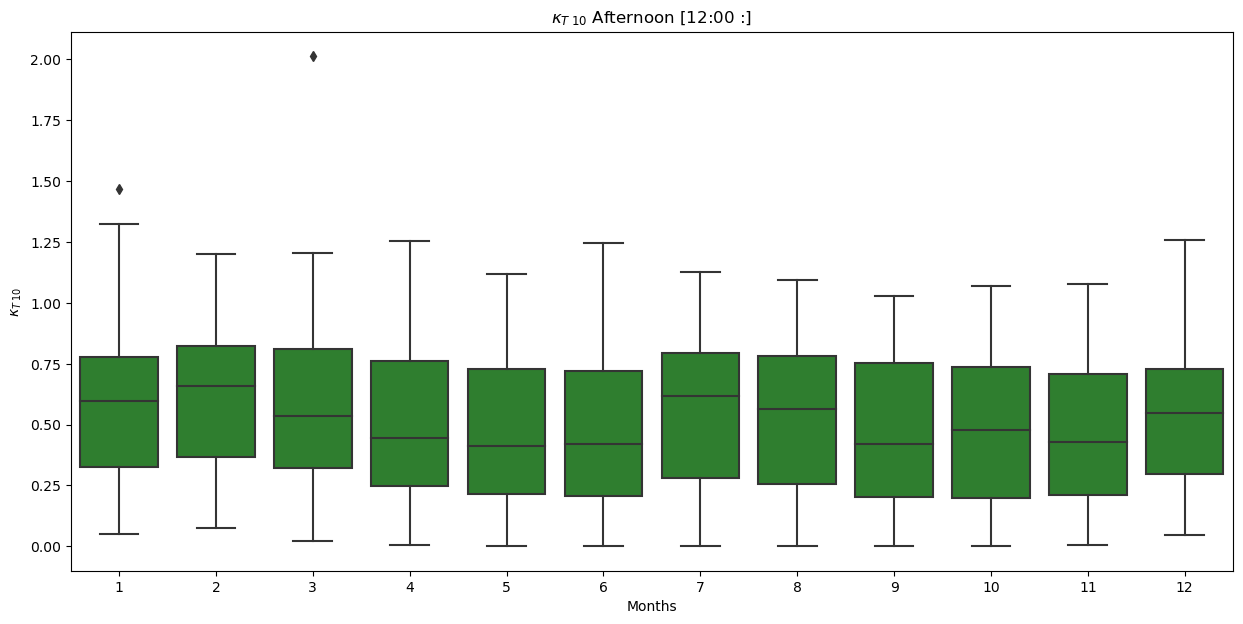

In [12]:
# get month names; optional step for renaming the xticklabels
#months = list(months)[1:]

# now just plot the dateframe with seaborn
fig, ax = plt.subplots(figsize=(15, 7))

sns.boxplot(x=df.TIMESTAMP.dt.month, y=df.kt_10min, color ='forestgreen')#, hue=df.TIMESTAMP.dt.year, ax=ax)
#ax.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Month', xticklabels=range(1,13))  # setting the xticklabels is optional

#plt.ylim(0,1.75)
plt.ylabel(r'$\kappa_{T\;10}$')
plt.xlabel('Months')
plt.title(r'$\kappa_{T\;10}$ Afternoon [12:00 :]')
plt.savefig('Boxplots_tardes')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

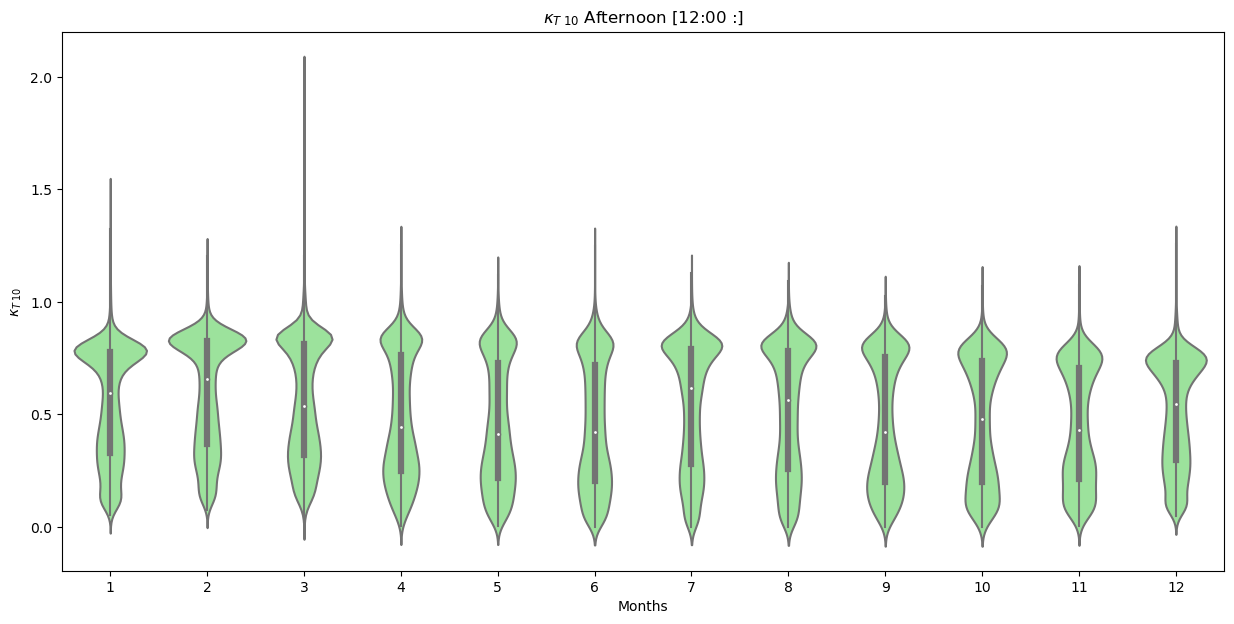

In [55]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.violinplot(x=df.TIMESTAMP.dt.month, y=df.kt_10min,color='lightgreen')#palette ='Greens')# color ='forestgreen')#, hue=df.TIMESTAMP.dt.year, ax=ax)
#ax.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Month', xticklabels=range(1,13))  # setting the xticklabels is optional

#plt.ylim(0,1.75)
plt.ylabel(r'$\kappa_{T\;10}$')
plt.xlabel('Months')
plt.title(r'$\kappa_{T\;10}$ Afternoon [12:00 :]')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

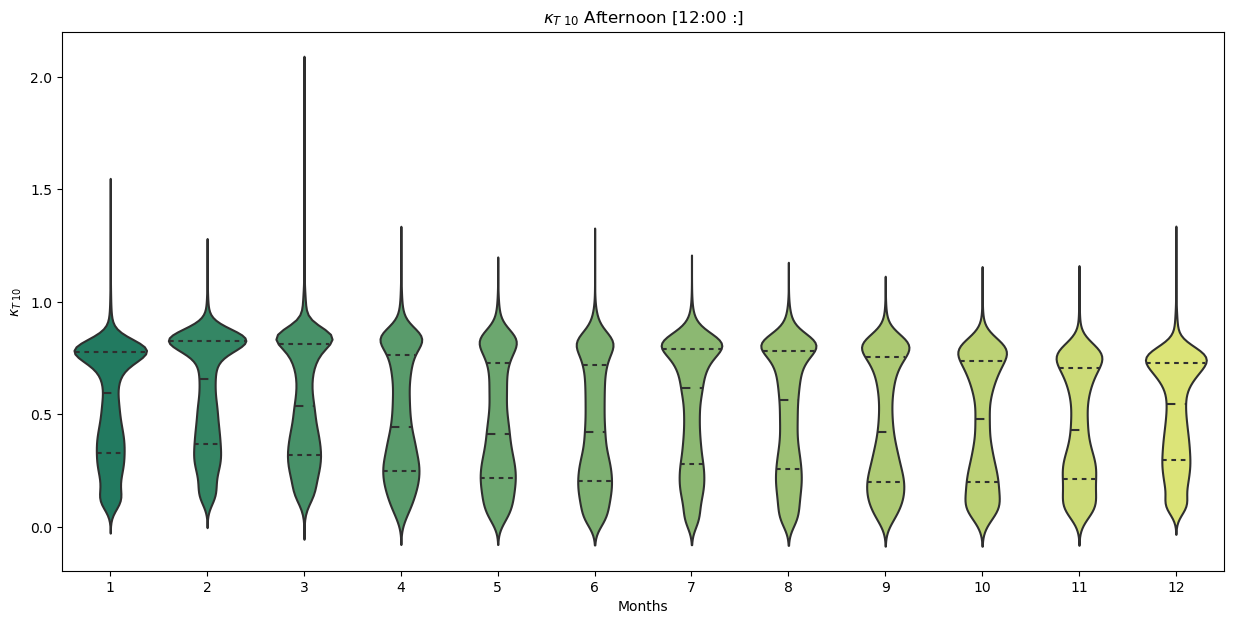

In [59]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.violinplot(x=df.TIMESTAMP.dt.month, y=df.kt_10min,palette = 'summer',inner='quartile')#palette ='Greens')# color ='forestgreen')#, hue=df.TIMESTAMP.dt.year, ax=ax)
#ax.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Month', xticklabels=range(1,13))  # setting the xticklabels is optional

#plt.ylim(0,1.75)
plt.ylabel(r'$\kappa_{T\;10}$')
plt.xlabel('Months')
plt.title(r'$\kappa_{T\;10}$ Afternoon [12:00 :]')
plt.show

n = len(kt)
ts = pd.DataFrame(new_col3[:n], index=pd.date_range(start="20011-01-01", periods=n, freq="10min"))
ts.groupby(lambda x: x.strftime("%m")).boxplot(subplots=False, figsize=(12,9), rot=90,notch = True)  #PER ANYS


#ts.groupby(lambda x: x.strftime("%Y-%m-%d")).boxplot(subplots=False, figsize=(12,9), rot=90)                PER DIES
plt.ylabel('Solar irradiance W/m^2')
plt.xlabel('Months')
plt.title('Monthly Solar Irradiance boxplot at Vall Perafita-Claror-Madriu')
plt.grid(visible=None)

In [35]:
data = csv.reader(open('results_hum_tarda.csv', 'r'), delimiter=",")#, quotechar='|')
column3, column7 =[],[]

for row in data:
    column3.extend([row[2]])
    column7.extend([row[7]])

In [36]:
col3,col7 = column3,column7
del col3[:1],col7[:1]

In [37]:
col3 =np.array(col3)
col3[col3 == ''] =np.nan
col3 = col3.astype(float)

col7 =np.array(col7)
col7[col7 == ''] =np.nan
col7 = col7.astype(float)

In [38]:
mask = ~(np.isnan(col3) | np.isnan(col7))

In [39]:
x = col3[mask]
print(x)

[78.57 77.15 76.26 ... 96.6  96.4  96.8 ]


In [40]:
y=col7[mask]
print(y)

[0.64324354 0.6603009  0.80795196 ... 0.1064149  0.09206927 0.09215235]


In [41]:
from scipy import stats

In [42]:
res = stats.linregress(x, y)
print(res.rvalue)
print(f"R-squared: {res.rvalue**2:.6f}")

-0.5743015957158594
R-squared: 0.329822


Moderate correlation


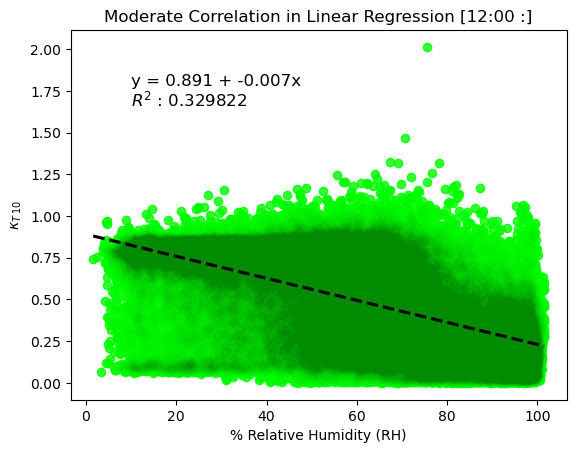

In [49]:


p=sns.regplot(x=x,y=y,scatter_kws={"color": "lime"}, line_kws={"color": "black"})

p.lines[0].set_linestyle("--")

plt.scatter(x=x,y=y,color ='forestgreen',alpha =0.005)

plt.xlabel('% Relative Humidity (RH)')
plt.ylabel(r'$\kappa_{T\;10}$')
plt.title('Moderate Correlation in Linear Regression [12:00 :]')

#---------------------------------------------------------------------------------------------

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())



#add regression equation to plot
plt.text(10, 1.78, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x',color = 'black',fontsize=12)
plt.text(10,1.66,fr'$R^{2}$ : {0.329822}',color ='black',fontsize=12)


#---------------------------------------------------------------------------------------------

plt.savefig('kt_vs_humrel_green_tarda')
print('Moderate correlation')